# Exploration
exploring data and inputs,outputs of some basic steps

In [1]:
from pipeline.prepare_data import generate_evidence_data

TRAIN_PATH = "data/train.json"
DEV_PATH = "data/dev.json"
TEST_PATH = "data/test.json"

joint_dev, labels_dev = generate_evidence_data(DEV_PATH)


In [2]:
print(type(joint_dev), len(joint_dev))
print(joint_dev[:5])

<class 'list'> 4224
['Outcome Measurement:  [SEP] there is a 13.2% difference between the results from the two the primary trial cohorts', '  Event-free Survival [SEP] there is a 13.2% difference between the results from the two the primary trial cohorts', '  Event free survival, the primary endpoint of this study, is defined as the time from randomization to the time of documented locoregional or distant recurrence, new primary breast cancer, or death from any cause. [SEP] there is a 13.2% difference between the results from the two the primary trial cohorts', '  Time frame: 5 years [SEP] there is a 13.2% difference between the results from the two the primary trial cohorts', 'Results 1:  [SEP] there is a 13.2% difference between the results from the two the primary trial cohorts']


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from pipeline.prepare_data import generate_nli_data

model_name = "MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli"


tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=250) 


encoded_dev = tokenizer(joint_dev, return_tensors='pt',
                        truncation_strategy='only_first', add_special_tokens=True, padding=True)

/home/pikachu/anaconda3/envs/nlp_1/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pikachu/anaconda3/envs/nlp_1/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2421: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will

In [4]:
encoded_dev.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

## doubt?
1. what is that model_max_length doing? 

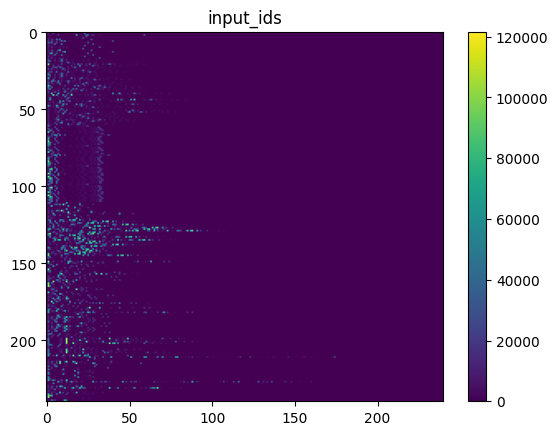

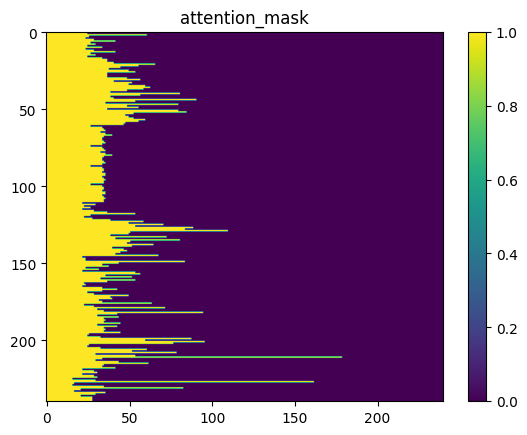

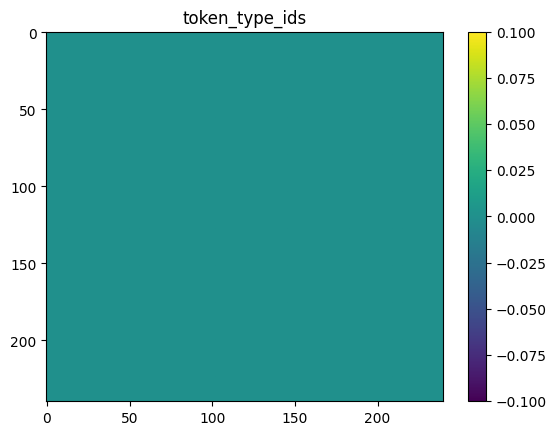

In [5]:
import matplotlib.pyplot as plt

first_n_samples = 240
for key in ['input_ids','attention_mask', 'token_type_ids', ]:
    # print(key, encoded_dev[key].shape)
    #plot them as images
    twoD_matrix = encoded_dev[key].detach().numpy()[:first_n_samples]
    plt.imshow(twoD_matrix, aspect='auto')
    plt.colorbar()
    plt.title(key)
    plt.show()

## understand the data

In [6]:
import pandas as pd
file_path = "data/train.json"
df = pd.read_json(file_path)
df = df.transpose()
df.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label,Primary_evidence_index,Secondary_evidence_index
5bc844fc-e852-4270-bfaf-36ea9eface3d,Comparison,Intervention,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction,"[0, 1, 2, 3, 4, 5]","[0, 1, 2, 3, 4, 5]"
86b7cb3d-6186-4a04-9aa6-b174ab764eed,Single,Eligibility,NCT00662129,NaN,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction,"[18, 22, 23, 24]",NaN
dbed5471-c2fc-45b5-b26f-430c9fa37a37,Comparison,Adverse Events,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment,"[0, 3]","[0, 7, 8, 9, 10]"
20c35c89-8d23-4be3-b603-ac0ee0f3b4de,Single,Eligibility,NCT01097642,NaN,Adult Patients with histologic confirmation of...,Contradiction,"[0, 1, 3, 4, 5]",NaN
f17cb242-419d-4f5d-bfa4-41494ed5ac0e,Comparison,Intervention,NCT00852930,NCT02308020,Laser Therapy is in each cohort of the primary...,Contradiction,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6]"


In [7]:
set(df.Section_id.tolist())

{'Adverse Events', 'Eligibility', 'Intervention', 'Results'}